# Part 1 - Exploratory Data Analysis

## Conclusion

Logins are greater on the weekends than during the work week days.

On the weekends logins going up around midnight till 04:00, than going down till 10:00, and going back up again up to sound 15:00. This activities could be due to weekends late night life style.

On weekdays there is a much lower volume of logins at night hours, and highest number of logins around Noon approximately from 9:00 to 11:00.

Also March has the highest volume of logins

Text(0.5, 1.0, 'Week Days Logins Over Time')

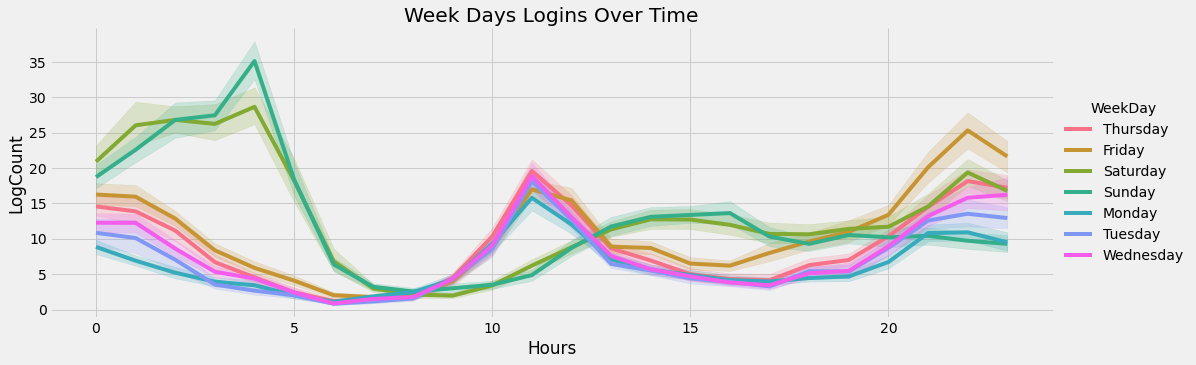

In [26]:
sns.relplot(data=df_Hours, x = 'Hours', y= 'LogCount', kind='line',hue='WeekDay',aspect=15/5)
plt.title('Week Days Logins Over Time')

# CODE

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.set_index('login_time', inplace=True)
df['LogCount'] = 1
df.head()

,LogCount
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [5]:
df_15m = df.resample('15min').sum()
df_15m.head()

,LogCount
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [6]:
df_15m['WeekDay'] = pd.DatetimeIndex(df_15m.index).day_name()
df_15m['Month']=pd.DatetimeIndex(df_15m.index).month_name()
df_15m.head()

,LogCount,WeekDay,Month
login_time,,,
1970-01-01 20:00:00,2,Thursday,January
1970-01-01 20:15:00,6,Thursday,January
1970-01-01 20:30:00,9,Thursday,January
1970-01-01 20:45:00,7,Thursday,January
1970-01-01 21:00:00,1,Thursday,January


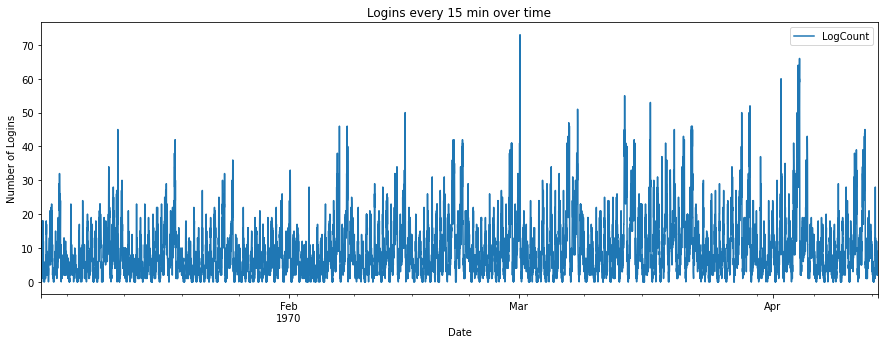

In [7]:
df_15m.plot(xlabel='Date', ylabel='Number of Logins', figsize=(15,5), kind='line')
plt.title('Logins every 15 min over time')
plt.show()

In [8]:
df_day = df.resample('D').sum()
df_day.head()

,LogCount
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


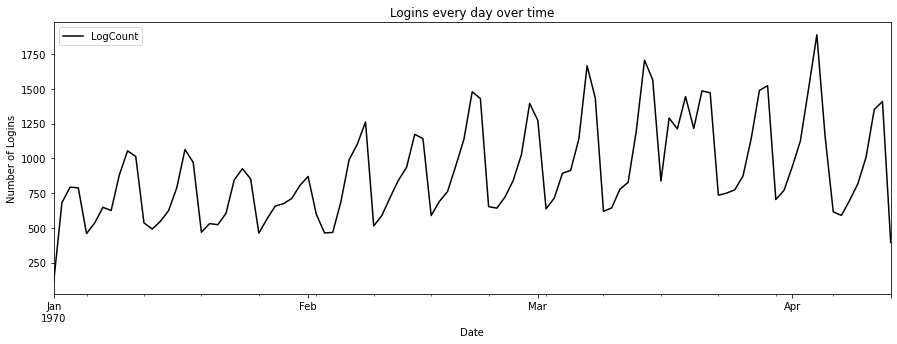

In [9]:
df_day.plot(xlabel='Date', ylabel='Number of Logins', figsize=(15,5), kind='line', color='k')
plt.title('Logins every day over time')
plt.show()

In [10]:
df_week = df.resample('W').sum()
df_week.head()

,LogCount
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744


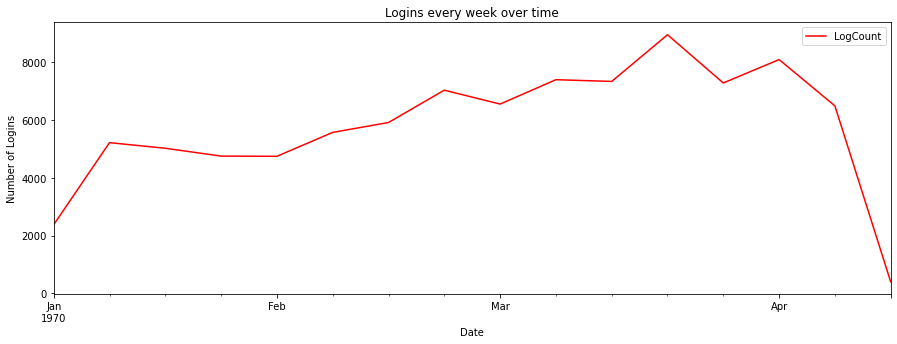

In [11]:
df_week.plot(xlabel='Date', ylabel='Number of Logins', figsize=(15,5), kind='line', color='r',)
plt.title('Logins every week over time')
plt.show()

1970-01-19 - Monday     
I will take 2 weeks (Monday through Sunday) to see if we have any patterns

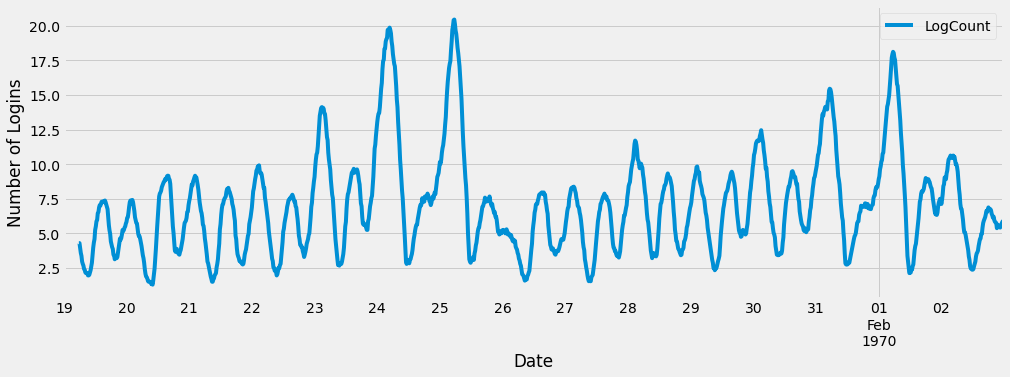

In [12]:
plt.style.use('fivethirtyeight')

df_15m.loc['1970-01-19':'1970-02-2'].rolling(window=24).mean().plot(figsize=(15,5), 
                                                                     xlabel='Date',ylabel='Number of Logins')
plt.show()

I can observe higher volume on the weekends than on the week days.

Let's take closer look at the weekend

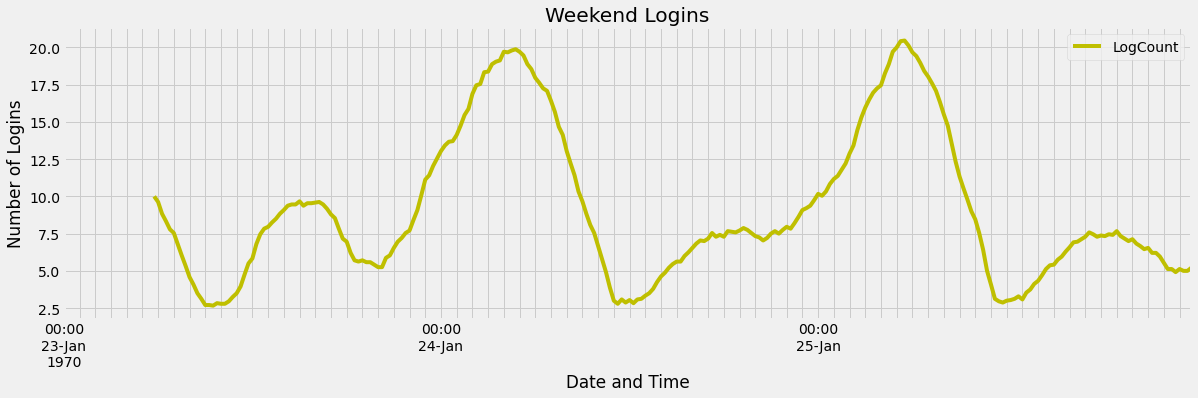

In [13]:
plt.style.use('fivethirtyeight')

df_15m.loc['1970-01-23':'1970-01-25'].rolling(window=24).mean().plot(figsize=(18,5), color='y',title = 'Weekend Logins',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
plt.xticks(np.arange(datetime(1970,1,23), datetime(1970,1,26), timedelta(hours=1)).astype(datetime))
plt.show()

Let's take closer look at the week days

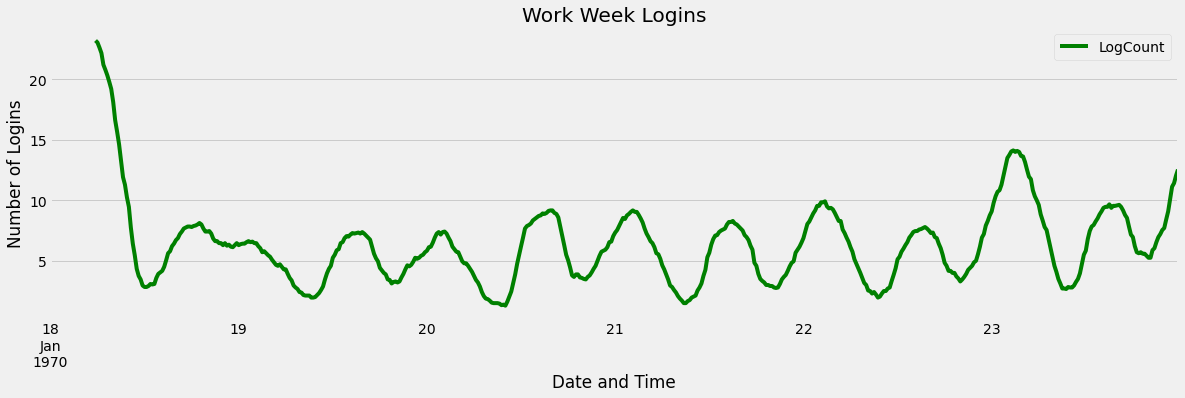

In [14]:
plt.style.use('fivethirtyeight')

df_15m.loc['1970-01-18':'1970-01-23'].rolling(window=24).mean().plot(figsize=(18,5), color='g',
                                                                     title= 'Work Week Logins',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
plt.show()

Comparing work week day by day

<AxesSubplot:title={'center':'Friday, Jen 23, 1970'}, xlabel='Date and Time', ylabel='Number of Logins'>

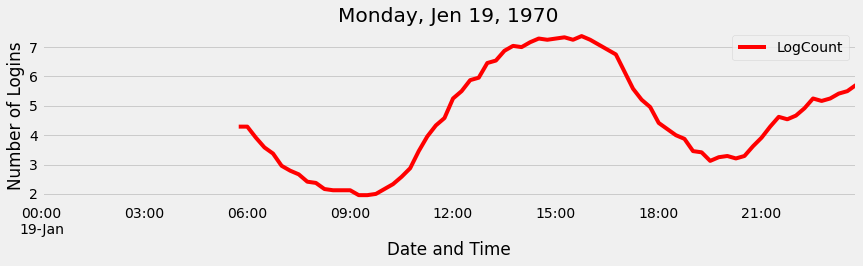

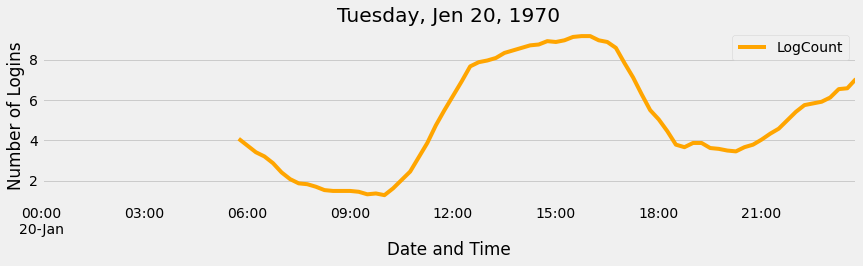

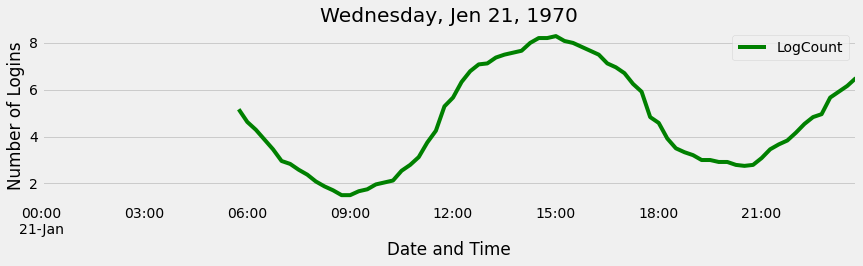

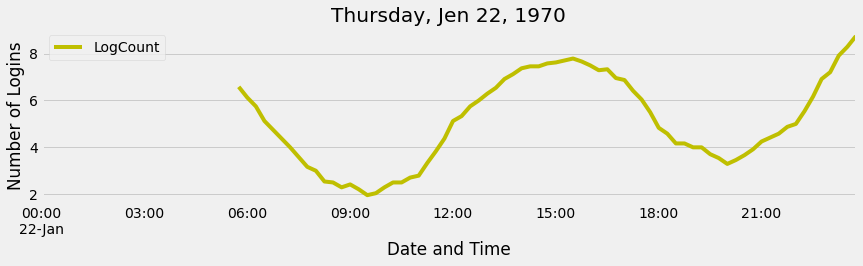

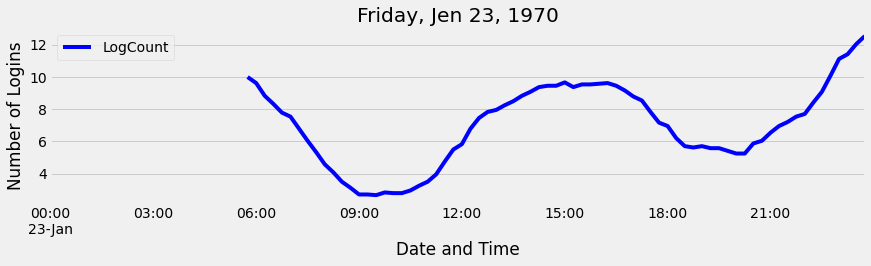

In [15]:
plt.style.use('fivethirtyeight')

df_15m.loc['1970-01-19'].rolling(window=24).mean().plot(figsize=(13,3), color='r', title= 'Monday, Jen 19, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
df_15m.loc['1970-01-20'].rolling(window=24).mean().plot(figsize=(13,3), color='orange', title= 'Tuesday, Jen 20, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
df_15m.loc['1970-01-21'].rolling(window=24).mean().plot(figsize=(13,3), color='g', title= 'Wednesday, Jen 21, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
df_15m.loc['1970-01-22'].rolling(window=24).mean().plot(figsize=(13,3), color='y', title= 'Thursday, Jen 22, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
df_15m.loc['1970-01-23'].rolling(window=24).mean().plot(figsize=(13,3), color='b', title= 'Friday, Jen 23, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')


Looks like on the weekdays logins going up around 9;00       
On Friday I can see increase of volume (above the work week average) of logins after 20:00

Comparing weekend day by day

<AxesSubplot:title={'center':'Sunday, Jen 25, 1970'}, xlabel='Date and Time', ylabel='Number of Logins'>

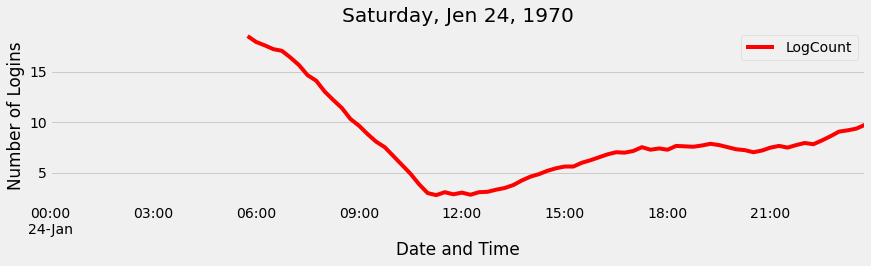

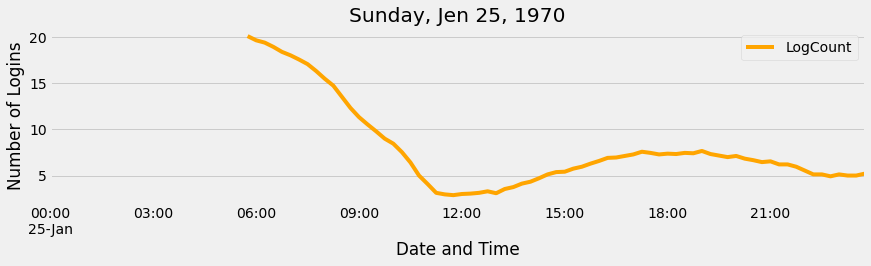

In [16]:
plt.style.use('fivethirtyeight')

df_15m.loc['1970-01-24'].rolling(window=24).mean().plot(figsize=(13,3), color='r', title= 'Saturday, Jen 24, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')
df_15m.loc['1970-01-25'].rolling(window=24).mean().plot(figsize=(13,3), color='orange', title= 'Sunday, Jen 25, 1970',
                                                                     xlabel='Date and Time',ylabel='Number of Logins')

On the weekend I can see high volume of logins around 04:00

In [17]:
df_Hours = df_15m
df_Hours['Hours'] = pd.DatetimeIndex(df_Hours.index).hour
df_Hours.head()

,LogCount,WeekDay,Month,Hours
login_time,,,,
1970-01-01 20:00:00,2,Thursday,January,20
1970-01-01 20:15:00,6,Thursday,January,20
1970-01-01 20:30:00,9,Thursday,January,20
1970-01-01 20:45:00,7,Thursday,January,20
1970-01-01 21:00:00,1,Thursday,January,21


# Let's check all week days over time

Text(0.5, 1.0, 'Week Days Logins Over Time')

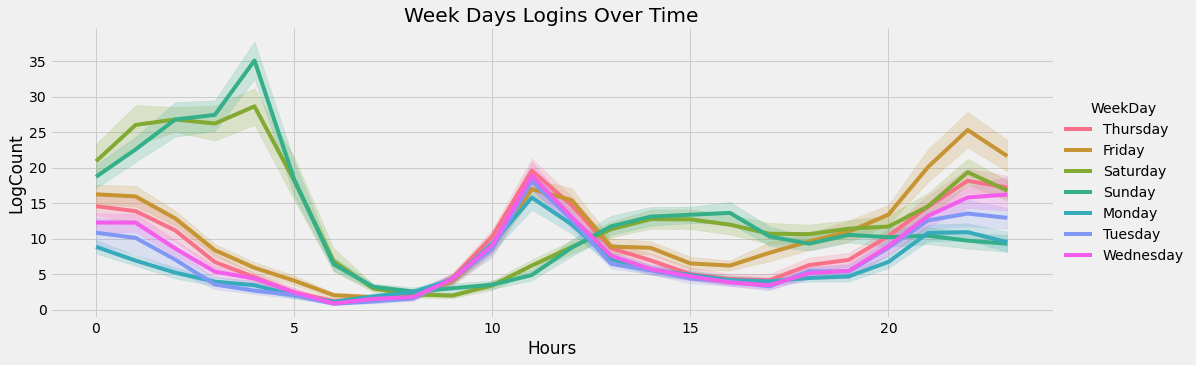

In [25]:
sns.relplot(data=df_Hours, x = 'Hours', y= 'LogCount', kind='line',hue='WeekDay',aspect=15/5)
plt.title('Week Days Logins Over Time')

Let's check which month has the most logins

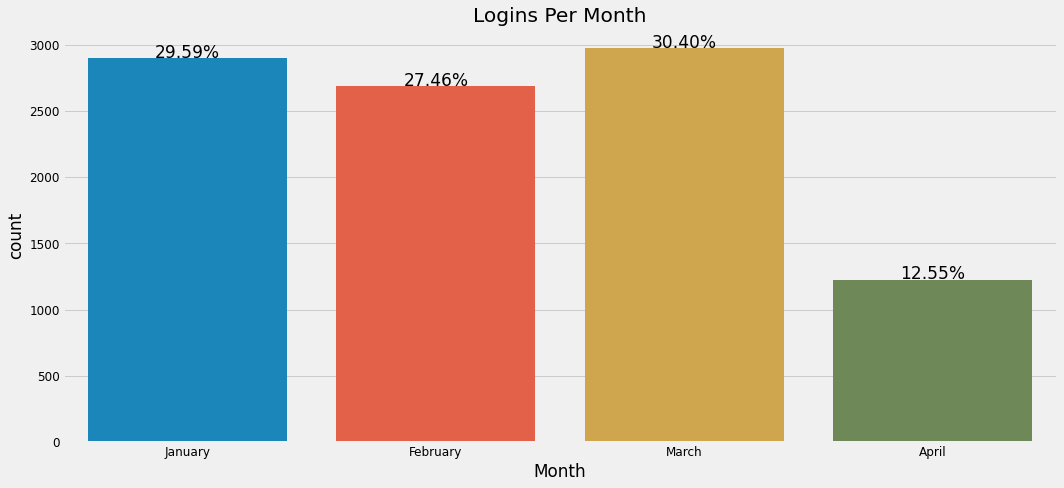

In [19]:
plt.figure(figsize=(15,7))
total = len(df_15m.LogCount)
ax = sns.countplot(x='Month', data=df_15m)


for h in ax.patches:
    height = h.get_height()
    ax.text(h.get_x() + h.get_width() / 2., height + 3,'{:1.2f}'.format((height/total)*100) + '%',
            ha="center",size=17)

plt.yticks(size = 12)
plt.xticks(size = 12)

plt.title('Logins Per Month')
plt.tight_layout()

March has the highest volume of logins